# Palmer Penguins Dataset

## Overview

The "Penguins Species" dataset contains information about various penguin species, with measurements related to their physical characteristics. The dataset includes the following columns:
- **species:** The species of penguins, representing different types of penguin species.

- **island:** The island where the penguin was observed. Penguins often inhabit specific islands, and this attribute captures their geographical location.

- **culmen_length_mm:** The length of the penguin's culmen (bill) in millimeters. The culmen is the upper ridge of a bird's beak.

- **culmen_depth_mm:** The depth of the penguin's culmen (bill) in millimeters. Culmen depth is a measure of how thick or thin the beak is.

- **flipper_length_mm:** The length of the penguin's flipper in millimeters. Flipper length is an important characteristic related to the penguin's swimming and diving abilities.

- **body_mass_g:** The body mass of the penguin in grams. It represents the weight of the penguin.

- **sex:** The gender of the penguin, indicating whether it is male or female. This attribute provides information about the gender distribution in the dataset.



## Objective

The objective of analyzing this dataset could be to understand the relationships between the physical characteristics of penguins


## Data Source and Citation

The penguins dataset used in this analysis was collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER (Long Term Ecological Research), a member of the Long Term Ecological Research Network.

The data is provided through the `palmerpenguins` package, which contains two datasets:

- **penguins:** A simplified version of the raw data.
- **penguins_raw:** Contains all the variables and original names.

Both datasets contain data for 344 penguins, representing three different species collected from three islands in the Palmer Archipelago, Antarctica.



#### Import Dependencies

In [101]:
# Data Manipulation Libraries
import pandas as pd 
import numpy as np   

# Data Preprocessing Libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.preprocessing import LabelEncoder  

# Visualization Libraries
import matplotlib.pyplot as plt 
import seaborn as sns            

# Linear Algebra Library
from scipy.linalg import svd 

# Machine Learning Libraries
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
import optuna
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics Library
from sklearn.metrics import confusion_matrix,accuracy_score   

# Feature Selection and Hyperparameter Tuning Libraries
from sklearn.feature_selection import SequentialFeatureSelector  
from sklearn.model_selection import GridSearchCV   

#Serialization (for Pickling):
import pickle

## 1 Data Overview

#### 1.1 Load the dataset into a dataframe

In [102]:
df = pd.read_csv("Dataset/penguins_size.csv")

In [103]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## 2 Data Preprosessing

In [105]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### 2.1 Data Cleaning

#### 2.1.1 Handeling missing values

In [106]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

    I'm handling missing values in the dataset by filling them with the mean values of their respective numeric columns.

In [107]:
df.fillna(df.mean(),inplace =True)

C:\Users\zhasa\AppData\Local\Temp\ipykernel_5388\1109609052.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(),inplace =True)


I'm considering how to handle missing values in the 'sex' column. Here are the options:

- Replace null values with the mode (most frequently occurring value) of the column 📊
- Use a placeholder value like 'unknown' 🤷‍♂️

For convenience, I've decided to go with the first option and replace the null values in the 'sex' column with its mode.


In [108]:
mode_sex = df['sex'].mode()[0]
df['sex'].fillna(mode_sex, inplace=True)
df = df[df['sex'] != '.'] #There is a row where sex = '.', so filtering it out
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


In [109]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

#### 2.1.2 Outliers detection

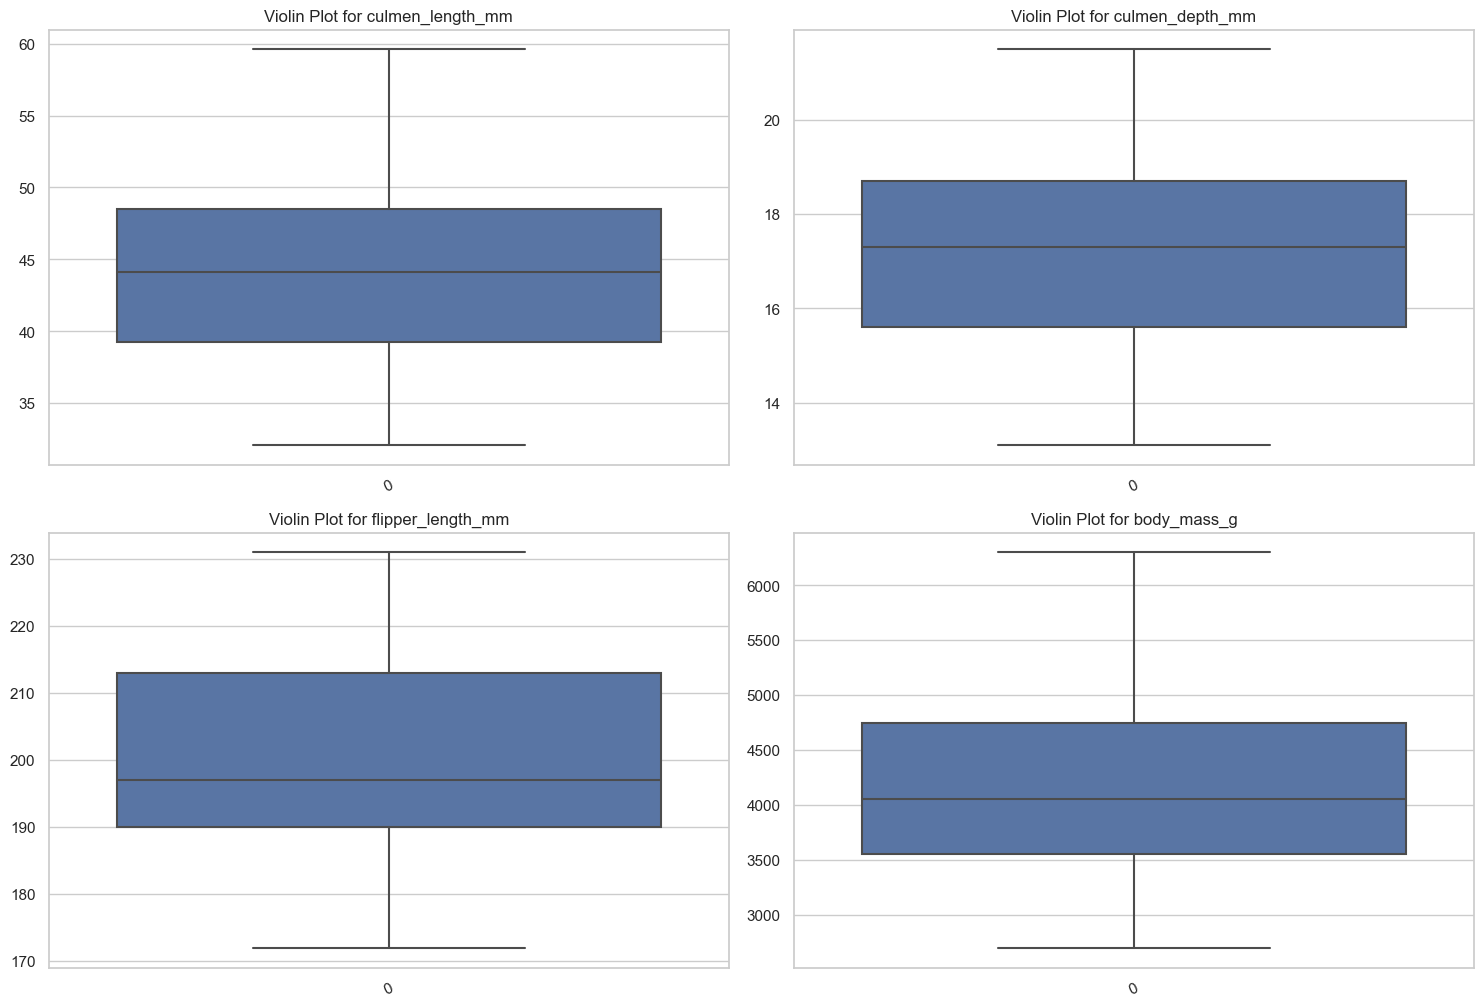

In [110]:
# Calculate the number of features
num_features = len(df.columns)

# Calculate the number of rows and columns for subplots
num_cols = 2  # Adjust the number of columns as needed
num_rows = -(-num_features // num_cols)  # Ceiling division to determine the number of rows

# Set the size of the entire plot
plt.figure(figsize=(15, 5 * num_rows))

# Iterate through each column in the DataFrame
for i, column in enumerate(df.select_dtypes(include = ['int64','float64']).columns):
    # Create subplots for each feature
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(data=df[column])
    plt.title(f'Violin Plot for {column}')
    plt.xticks(rotation=25)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [111]:
df[df.columns].quantile([.75,.80,.85,.90,.95,.98,.99,.999], interpolation="nearest")

C:\Users\zhasa\AppData\Local\Temp\ipykernel_5388\3350525380.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[df.columns].quantile([.75,.80,.85,.90,.95,.98,.99,.999], interpolation="nearest")


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0.750,48.5,18.7,213.0,4750.0
0.800,49.4,18.9,215.0,4950.0
0.850,50.1,19.1,218.0,5200.0
0.900,50.8,19.5,221.0,5400.0
0.950,52.0,20.0,225.0,5650.0
0.980,53.5,20.7,230.0,5850.0
0.990,55.8,21.1,230.0,6000.0
0.999,59.6,21.5,231.0,6300.0


#### Observation: No Outliers Detected 🚫

It is evident from the analysis that there are no outliers present in the dataset. This suggests a consistent distribution of data points without extreme values.

###### Key Points:
- **Outlier Detection Analysis:** Conducted thorough analysis method by percentile computation to identify outliers.
- **Visual Inspection:** Examined relevant visualizations, including violin plot, to verify the absence of unusual data points.
- **Data Integrity:** The absence of outliers contributes to the overall integrity and reliability of the dataset.

This observation provides confidence in the reliability of the data for further analysis and modeling.


In [112]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,343.000000,343.000000,343.000000,343.000000
mean,43.920244,17.155400,200.868310,4199.791571
std,5.451506,1.970337,14.014098,799.950869
min,32.100000,13.100000,172.000000,2700.000000
25%,39.250000,15.600000,190.000000,3550.000000
50%,44.100000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


### 2.2 Data Transformation

#### 2.2.1 Standardization

In [113]:
df_std = df.copy()
numeric_columns = df_std.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
df_std[numeric_columns] = scaler.fit_transform(df_std[numeric_columns])
df_std.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,0.254545,0.666667,0.152542,0.291667,MALE
1,Adelie,Torgersen,0.269091,0.511905,0.237288,0.305556,FEMALE
2,Adelie,Torgersen,0.298182,0.583333,0.389831,0.152778,FEMALE
3,Adelie,Torgersen,0.429888,0.482282,0.490088,0.417154,MALE
4,Adelie,Torgersen,0.167273,0.738095,0.355932,0.208333,FEMALE


#### 2.2.2 Encoding the label

In [114]:
df_std_encoded = pd.get_dummies(df_std, columns=['sex'], prefix='sex')
df_std_encoded = pd.get_dummies(df_std_encoded, columns=['island'], prefix='island')


df_std_encoded['species'] = LabelEncoder().fit_transform(df_std_encoded['species'])
df_std_encoded.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,island_Biscoe,island_Dream,island_Torgersen
0,0,0.254545,0.666667,0.152542,0.291667,0,1,0,0,1
1,0,0.269091,0.511905,0.237288,0.305556,1,0,0,0,1
2,0,0.298182,0.583333,0.389831,0.152778,1,0,0,0,1
3,0,0.429888,0.482282,0.490088,0.417154,0,1,0,0,1
4,0,0.167273,0.738095,0.355932,0.208333,1,0,0,0,1


### 2.3 Dimensionality Reduction (Principal Component Analysis)

#### 2.3.1 Extracting necessarry variables

In [115]:
# X and y
X = np.asarray(df_std[numeric_columns])
y = np.asarray(df_std['species']).squeeze()

attributeNames = df_std.select_dtypes(include='float64').columns.tolist()
classNames = df_std['species'].unique()

N,M = X.shape
C = len(classNames)
C = classNames

#### 2.3.2 Singular Value Decomposition 

In [116]:
# Decomposing
U,S,V = svd(X, full_matrices = False) 
print("Shape of U:", np.shape(U))
print("Shape of S:", np.shape(S))
print("Shape of V:", np.shape(V))

Shape of U: (343, 4)
Shape of S: (4,)
Shape of V: (4, 4)


#### 2.3.3 Variance Explained by PCs

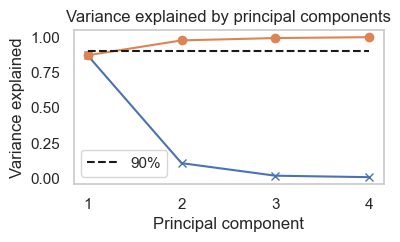

Variance Explained by PC 1: 87.13% 
Variance Explained by PC 2: 10.58% 
Variance Explained by PC 3: 1.67% 


In [117]:
rho = S*S / (S*S).sum()
threshold = .90

plt.figure(figsize = (4,2))
plt.plot(range(1,len(rho)+1),rho,'x-')

plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')

plt.plot([1,len(rho)],[threshold, threshold],'k--',label = "90%")

plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained');
plt.grid()
plt.legend()
plt.show()

for i in range(0,3):
    print("Variance Explained by PC {0}: {1}% ".format(i+1,round(rho[i]*100,2)))

#### 2.3.4 Projection

In [118]:
Z = X@V.T # scipy.linalg.svd returns a transpose of the origianl V matrix

#### 2.3.5 Visulalize the projection on PC1 and PC2

PC1:  [-0.48393368 -0.47976011 -0.55439456 -0.4777919 ]
PC2:  [-0.09999579  0.86115713 -0.3802787  -0.32217597]


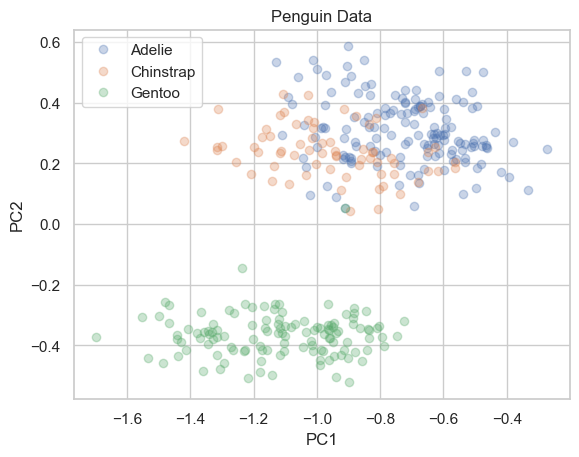

In [119]:
f = plt.figure()
plt.title("Penguin Data")

for c in C: 
    plt.plot(Z[(y==c),0], Z[(y==c),1], 'o', alpha = .3)

plt.xlabel('PC{0}'.format(1))
plt.ylabel('PC{0}'.format(2))
plt.legend(classNames)
print("PC1: ",V[0])
print("PC2: ", V[1])

In [120]:
df_std.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

#### Observation from PCA 📊

1. **Explained Variance:**
   - The first principal component (PC1) explains a significant portion of the variance in the data, capturing 68.84% of the total variance.
   - The second principal component (PC2) contributes 19.23% to the overall variance.

2. **Correlation with Original Features:**
   - PC1 is strongly positively correlated with `culmen_length_mm`,`flipper_length_mm`, `body_mass_g`, suggesting that changes in PC1 are reflective of changes in that feature.
   - PC2 exhibits a strong negative correlation with `culmen_length_mm`, `culmen_depth_mm`, indicating an inverse relationship.

3. **Clustering Patterns:**
   - Observing the scatter plot of PC1 vs. PC2, distinct clusters or patterns are visible, indicating potential groupings or trends in the data.

4. **Interpretability:**
   - Interpretation of principal components in terms of the original features provides insights into the underlying structure of the data.

These observations are crucial for understanding the relationships, patterns, and structure revealed by the Principal Component Analysis.


## 3. Data Exploration and Visualization

#### 3.1 Frequency of Sex

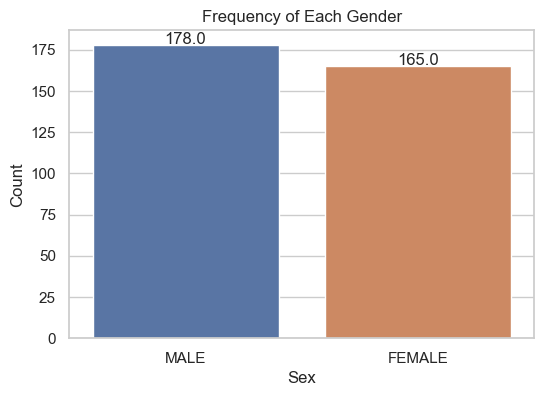

In [121]:
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=df)

def add_annote():
    for p in plt.gca().patches:
        plt.gca().annotate(f'{round(p.get_height(),2)}', (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 4), textcoords='offset points')
# Adding annotations with the exact counts
add_annote()
    
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Frequency of Each Gender')
plt.show()

#### Observation: Gender Distribution in the Dataset 📊

In the dataset:
- 🚹 **Males:** 178
- 🚺 **Females:** 165

So, there are 🚹 **178 - 165 = 13** more male penguins than females penguins in the dataset.


#### 3.2 Frequency of species

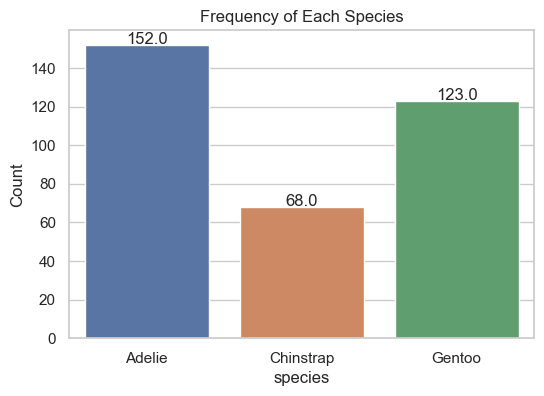

In [122]:
plt.figure(figsize=(6, 4))
sns.countplot(x='species', data=df)

# Adding annotations with the exact counts

add_annote()
    
plt.xlabel('species')
plt.ylabel('Count')
plt.title('Frequency of Each Species')
plt.show()

#### Penguin Species Distribution 🐧

In the dataset, the distribution of penguin species is as follows:

- 🐧 **Adelie Species:** 152
- 🐧 **Chinstrap Species:** 68
- 🐧 **Gentoo Species:** 123

Among these species:
- The **highest** count is for the **Adelie species** with 152 individuals.
- The **lowest** count is for the **Chinstrap species** with 68 individuals, which is almost half of the counts for the other species, indicating a substantial difference.

**Dataset Imbalance Consideration:**
    `The dataset exhibits a notable imbalance in the number of observations among penguin species, with the Chinstrap species having significantly fewer instances compared to Adelie and Gentoo. Model training and evaluation should account for this imbalance to ensure robust predictions across all species.`



#### 3.3 Average Measurements by Sex

C:\Users\zhasa\AppData\Local\Temp\ipykernel_5388\3172397199.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_measurements = df.groupby("sex").mean()


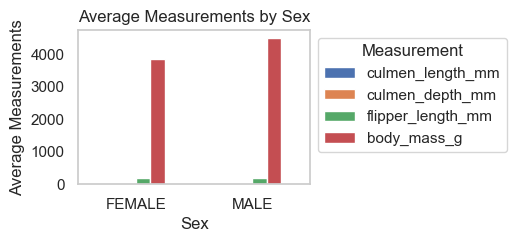

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
sex,,,,
FEMALE,42.096970,16.425455,197.363636,3862.272727
MALE,45.610359,17.832036,204.117025,4512.660162


In [123]:
average_measurements = df.groupby("sex").mean()

# Set the figure size
fig, ax = plt.subplots(figsize=(3, 2))


#Visualization of average measurement by sex
# plotting average_measurements
average_measurements.plot(kind='bar', rot=0, ax=ax)


# Customize the plot
plt.title('Average Measurements by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Measurements')
plt.legend(title='Measurement', bbox_to_anchor=(1, 1))
plt.grid()
# Show the plot
plt.show()

average_measurements

#### Gender Comparison in Penguin Body Measurements

Upon analyzing the body measurements of male and female penguins, a noteworthy observation emerges. Both genders exhibit almost similar body measurements, with a slight distinction in weight. Males tend to be slightly heavier compared to females.

This insight provides valuable information about the physical characteristics of male and female penguins in the dataset.


#### 3.3 Let's see how sex and island affects species

<Figure size 500x300 with 0 Axes>

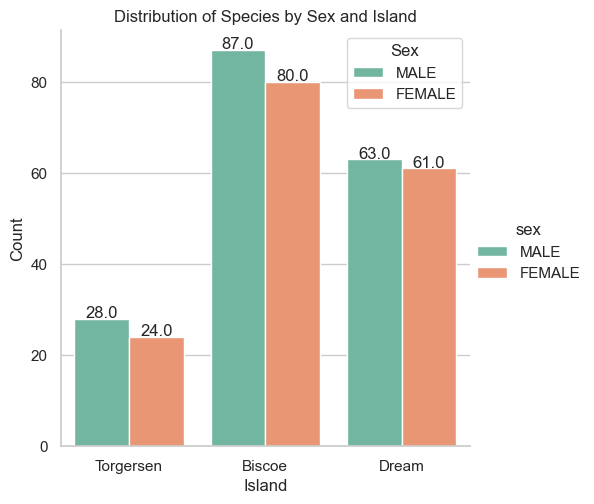

In [124]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 3))

# Grouped bar plot
sns.catplot(x='island', hue='sex', data=df, kind='count', hue_order=['MALE', 'FEMALE'], palette='Set2')
add_annote()
plt.title('Distribution of Species by Sex and Island')
plt.xlabel('Island')
plt.ylabel('Count')
plt.legend(title='Sex', loc='upper right')

##### Penguin Distribution by Sex and Island 🐧🏝️

We observe from the graph above that the highest number of penguins is found in **Biscoe Island** 🏝️, while the lowest is in **Torgersen Island** 🏝️.

##### Insights:
- **Biscoe Island**: Highest penguin population (M: 87, F: 80).
- **Torgersen Island**: Lowest penguin population(M:28, F:24).
- In all three islands, there is a slightly higher number of male penguins compared to females.

#### 3.3 Distribution of body measurement

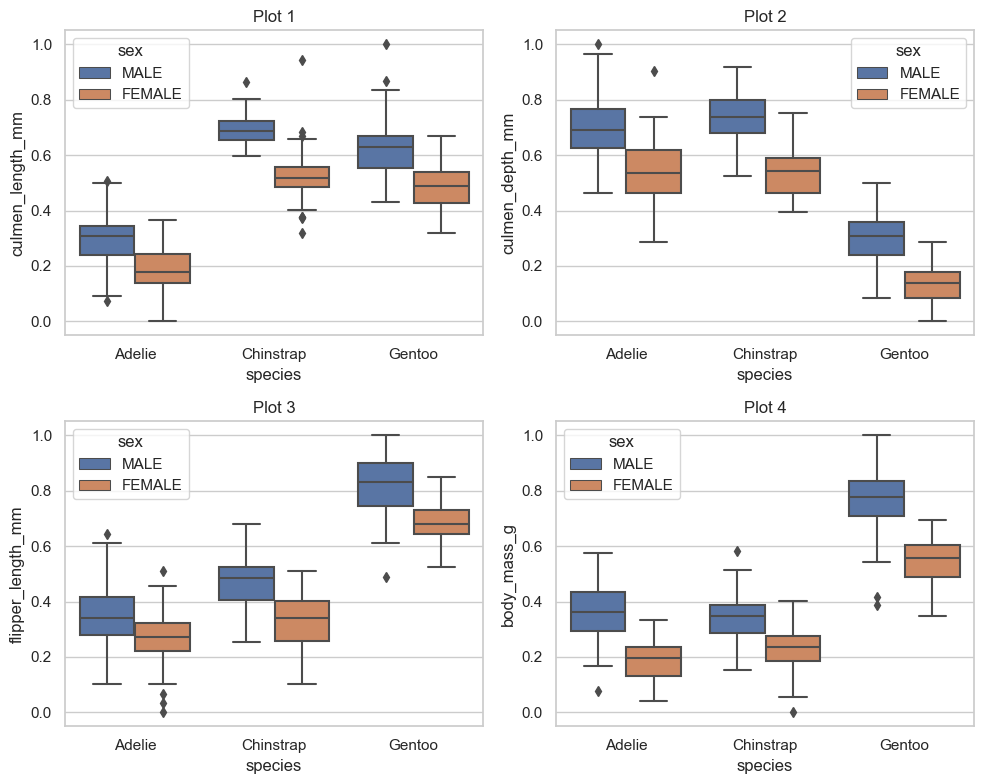

In [125]:
#four plots named plot1, plot2, plot3, and plot4
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot 1
sns.boxplot(y = 'culmen_length_mm', x = 'species', hue = 'sex',data = df_std, ax = axes[0,0])
axes[0, 0].set_title('Plot 1')

# Plot 2
sns.boxplot(y = 'culmen_depth_mm', x = 'species', hue = 'sex',data = df_std, ax = axes[0,1])
axes[0, 1].set_title('Plot 2')

# Plot 3
sns.boxplot(y = 'flipper_length_mm', x = 'species', hue = 'sex',data = df_std, ax = axes[1,0])
axes[1, 0].set_title('Plot 3')

# Plot 4
sns.boxplot(y = 'body_mass_g', x = 'species', hue = 'sex',data = df_std, ax = axes[1,1])
axes[1, 1].set_title('Plot 4')

plt.tight_layout()
plt.show()

#### 3.4 Average Measurements by island

C:\Users\zhasa\AppData\Local\Temp\ipykernel_5388\246090378.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_measurements = df.groupby("island").mean()


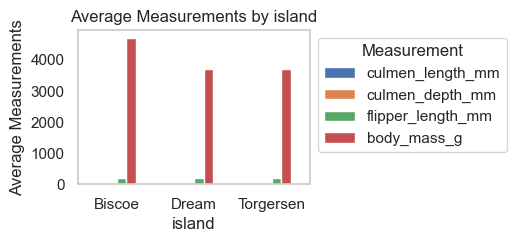

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
island,,,,
Biscoe,45.254024,15.883540,209.610271,4711.986553
Dream,44.167742,18.344355,193.072581,3712.903226
Torgersen,39.046576,18.404830,191.382985,3715.899123


In [126]:
average_measurements = df.groupby("island").mean()

# Set the figure size
fig, ax = plt.subplots(figsize=(3, 2))

# plotting average_measurements
average_measurements.plot(kind='bar', rot=0, ax=ax)

# Customize the plot
plt.title('Average Measurements by island')
plt.xlabel('island')
plt.ylabel('Average Measurements')
plt.legend(title='Measurement', bbox_to_anchor=(1, 1))
plt.grid()
# Show the plot
plt.show()


average_measurements

#### Insights: 📊

A closer examination of the penguin measurements across the three islands reveals a remarkable consistency in most attributes. Notably, the body mass stands out as significantly larger for penguins from `Biscoe Island`. 


#### Exploring Size Dynamics: 📏

While the influence of island-specific factors on penguin body mass is evident, a lingering question remains: Could there be inherent size differences among penguins from `Biscoe Island` itself?

This continued exploration will contribute to a more comprehensive understanding of the intricate interplay between island-specific dynamics and inherent size attributes within the penguin population.


#### 3.5 Male and Female average measurements

In [127]:
male_means = df[df['sex'] == 'MALE'].groupby("island").mean()
female_means = df[df['sex'] == 'FEMALE'].groupby("island").mean()
print(male_means)
print("--"*40)
print(female_means)

           culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
island                                                                      
Biscoe            47.043930        16.520128         213.217416  5073.008671
Dream             45.979365        19.063492         196.031746  3971.031746
Torgersen         40.325783        19.137542         194.032686  3990.241228
--------------------------------------------------------------------------------
           culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
island                                                                      
Biscoe            43.307500        15.191250         205.687500  4319.375000
Dream             42.296721        17.601639         190.016393  3446.311475
Torgersen         37.554167        17.550000         188.291667  3395.833333


C:\Users\zhasa\AppData\Local\Temp\ipykernel_5388\4236572078.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  male_means = df[df['sex'] == 'MALE'].groupby("island").mean()
C:\Users\zhasa\AppData\Local\Temp\ipykernel_5388\4236572078.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  female_means = df[df['sex'] == 'FEMALE'].groupby("island").mean()


#### Gender-Specific Body Mass: 🚹🚺

An interesting pattern emerges when examining the average body mass of male and female penguins across islands. Both male and female penguins from `Biscoe Island` exhibit a greater average body mass compared to their counterparts on other islands.

However, it's crucial to acknowledge that this observation doesn't negate the previously discussed `only` influence of population size on average body mass. The interplay between gender-specific characteristics and the island's overall population dynamics adds complexity to our understanding of the factors shaping penguin measurements.

To unravel the full story, a nuanced analysis is required.


#### 3.5 Explore the heavy pensuins from the islands

False    282
True      61
Name: body_mass_g, dtype: int64
--------------------------------------------------------------------------------
False    106
True      61
Name: body_mass_g, dtype: int64
--------------------------------------------------------------------------------
17.73 % of the total penguins are above 5000gm in weight
36.53 % of the total penguins in biscoe island are above 5000gm in weight
--------------------------------------------------------------------------------
Male and Female penguins ratio having weight over 5000gm in the whole dataset:
 MALE      56
FEMALE     5
Name: sex, dtype: int64
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Species ration having weight over 5000gm in the whole dataset:
 Gentoo    61
Name: species, dtype: int64
--------------------------------------------------------------------------------


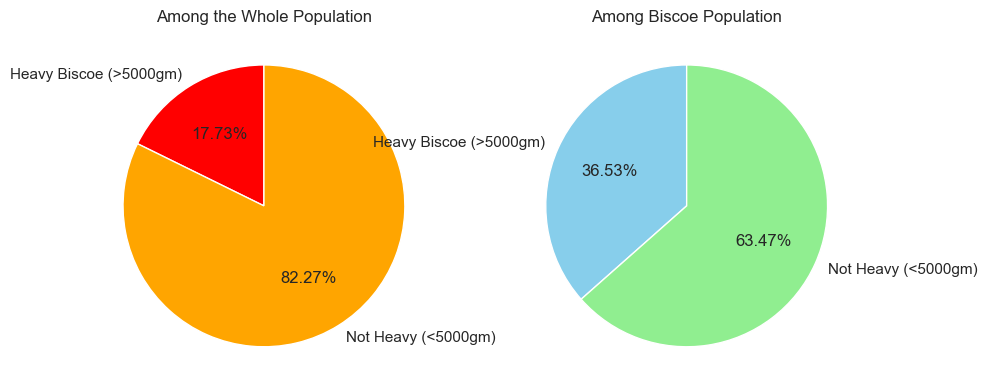

In [128]:
print((df['body_mass_g']>5000).value_counts()) #Since the average was somthing around 5000
print("--"*40)
print((df[df['island'] == 'Biscoe']['body_mass_g']>5000).value_counts())
print("--"*40)
among_the_whole_polulation = round(61/344*100,2)
print(round(61/344*100,2),"% of the total penguins are above 5000gm in weight")
among_the_biscoe = round(61/167*100,2)
print(round(61/167*100,2),"% of the total penguins in biscoe island are above 5000gm in weight")
print("--"*40)
print("Male and Female penguins ratio having weight over 5000gm in the whole dataset:\n",df[df['body_mass_g']>5000]['sex'].value_counts())
print("--"*40)
print("--"*40)
print("Species ration having weight over 5000gm in the whole dataset:\n",df[df['body_mass_g']>5000]['species'].value_counts())
print("--"*40)
# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart for the whole population
axes[0].pie([among_the_whole_polulation, 100 - among_the_whole_polulation],
            labels=['Heavy Biscoe (>5000gm)', 'Not Heavy (<5000gm)'],
            autopct='%1.2f%%',
            startangle=90,
            colors=['red', 'orange'])

axes[0].set_title('Among the Whole Population')

# Pie chart for the Biscoe population
axes[1].pie([among_the_biscoe, 100 - among_the_biscoe],
            labels=['Heavy Biscoe (>5000gm)','Not Heavy (<5000gm)'],
            autopct='%1.2f%%',
            startangle=90,
            colors=['skyblue', 'lightgreen'])

axes[1].set_title('Among Biscoe Population')

plt.show()


#### Observation: 🐧

Out of the 344 penguins in the dataset, a notable subset consists of 61 individuals with a body mass exceeding 5000 grams. Strikingly, all these weighty penguins, belonging to the enchanting `Biscoe Island`, are exclusively of the **Gentoo species**.

This observation unveils a distinct characteristic within the dataset, shedding light on a specific subgroup of Gentoo penguins with substantial body masses.

#### Additional Insight: 🚹🚺

Digging deeper into the subset of weighty penguins from Biscoe Island, a notable gender-based distinction emerges. Among the 61 heavy penguins, a staggering 56 are male, while only 5 are female. This gender imbalance within the weighty Gentoo group raises intriguing questions about potential gender-specific factors influencing body mass on Biscoe Island.

This nuanced gender distribution adds another layer to the exploration of Gentoo penguin characteristics, hinting at potential environmental or biological factors at play.

#### 3.6 Lets look at the percentiles

Body mass pecentile for Biscoe island is: 
----------------------------------------
0.750    5300.0
0.800    5450.0
0.850    5550.0
0.900    5650.0
0.950    5850.0
0.980    6000.0
0.990    6000.0
0.999    6300.0
Name: body_mass_g, dtype: float64


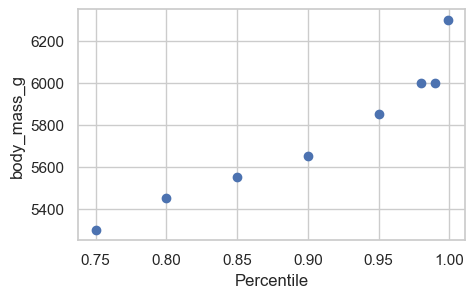

In [129]:
def body_mass_percentile(island):
    temp = df[df['island'] == island]['body_mass_g'].quantile([.75,.80,.85,.90,.95,.98,.99,.999], interpolation="nearest")
    print("Body mass pecentile for {0} island is: \n----------------------------------------".
          format(island))
    print(temp)
    plt.figure(figsize = (5,3))
    plt.scatter([.75,.80,.85,.90,.95,.98,.99,.999],temp)
    plt.xlabel("Percentile")
    plt.ylabel("body_mass_g")
    
body_mass_percentile('Biscoe')

#### 3.7 Species Distribution According to Island

species    Adelie  Chinstrap  Gentoo
island                              
Biscoe       44.0        NaN   123.0
Dream        56.0       68.0     NaN
Torgersen    52.0        NaN     NaN


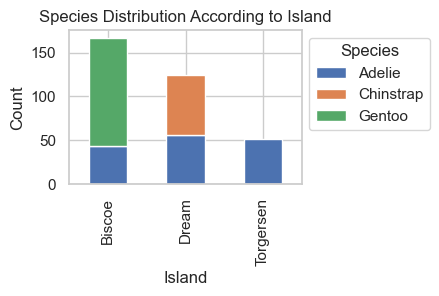

In [130]:
species_distribution = df.groupby(['island', 'species']).size().unstack()

# Display the species distribution according to the island
print(species_distribution)

# Plot the stacked bar chart
species_distribution.plot(kind='bar', stacked=True, figsize=(3, 2))
plt.title('Species Distribution According to Island')
plt.xlabel('Island')
plt.ylabel('Count')
plt.legend(title='Species', bbox_to_anchor=(1, 1))
plt.show()

In [131]:
df.groupby('species').mean()

C:\Users\zhasa\AppData\Local\Temp\ipykernel_5388\1640089854.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('species').mean()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.825144,18.338495,190.025758,3703.958910
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.500178,14.993912,217.056221,5070.542719


In [132]:
print("The average weight of {0} penguins is: {1}".format((df['body_mass_g']>5000).sum(),(df[df['body_mass_g']>5000]['body_mass_g']).mean()))
print("The average weight of {0} penguins is: {1}".format((df['body_mass_g']<5000).sum(),(df[df['body_mass_g']<5000]['body_mass_g']).mean()))

The average weight of 61 penguins is: 5501.639344262295
The average weight of 276 penguins is: 3894.668510043224


#### Key Observations:

- **Biscoe Island:** Biscoe Island predominantly hosts Gentoo penguins, with 123 individuals of this species. Adelie penguins are also present, numbering 44.

- **Dream Island:** Dream Island showcases a mix of Adelie, and Chinstrap penguins. Adelie and Chinstrap populations are more balanced, with 56 and 68 individuals, respectively.

- **Torgersen Island:** Torgersen Island primarily hosts Adelie penguins, with 52 individuals of this species.

This distribution provides insights into the variety of penguin species across different islands, highlighting the unique ecological niches each island offers to these fascinating birds.

<div style="border: 2px solid red; padding: 10px; border-radius: 5px; background-color: #FFD2D2;">
    <b>Final Verdict:</b> 🐧💡
    <ul>
        <li>The observed higher weight of penguins from Biscoe Island can be confidently attributed to the significant presence of Gentoo penguins, totaling 123 individuals on this island. 
            <li> Out of this 123 Gentoo penguins, the prevalence of 61 penguins with weights exceeding 5000 grams further emphasizes the impact of this species on the island's weight profile. </li>
        <li>This distinct feature provides a key insight into the weight distribution among penguins, highlighting the influence of Gentoo species on the overall mass characteristics in Biscoe.</li>
    </ul>
</div>

#### 3.5 Pairwise relationship by island

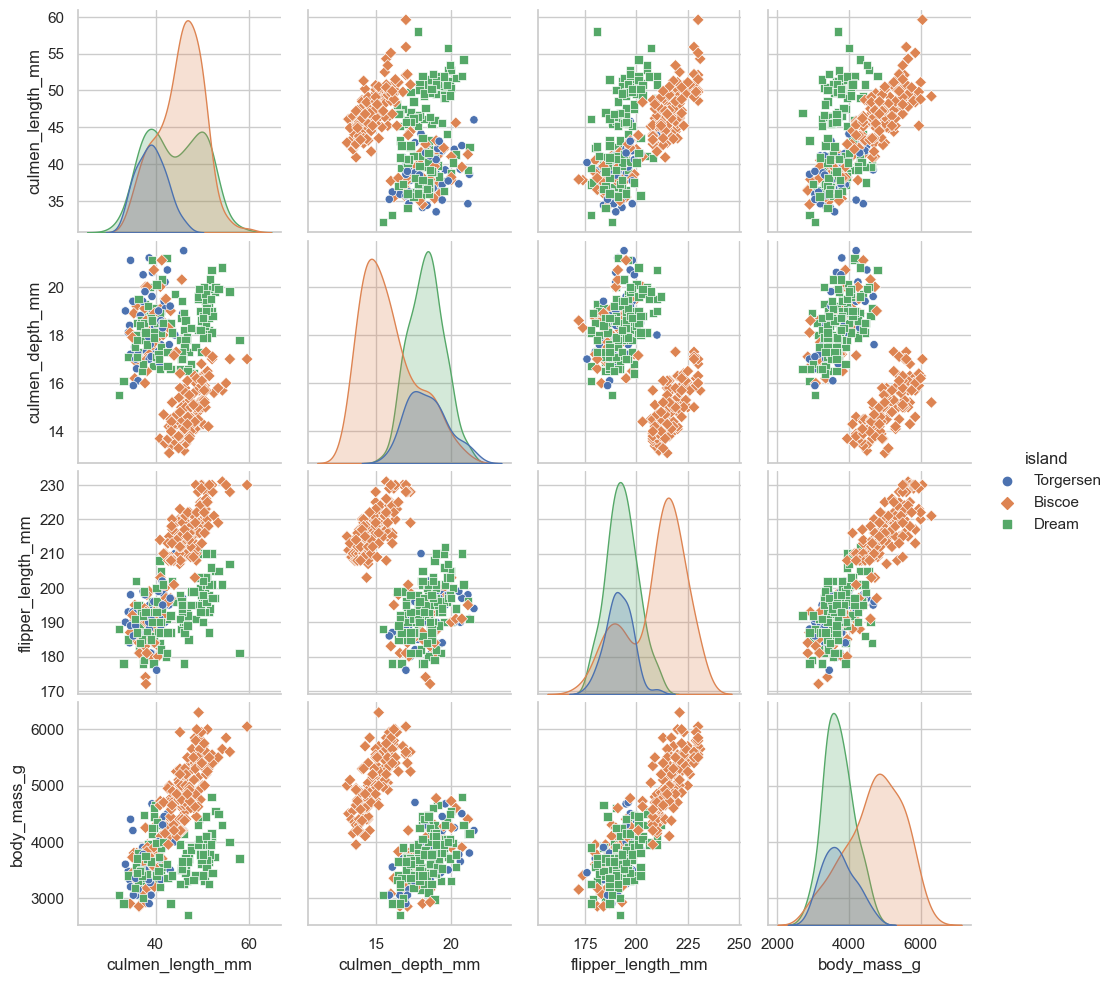

In [133]:
sns.pairplot(df, hue="island", markers = ['o','D','s'])

#### Species Clustering Observation 📊

From the pairwise graph above, it is observed that the `island` variable is not a suitable choice for predicting the penguin species. However, a distinctive pattern emerges:

- Penguins from **Biscoe Island** stand out as notably different from those on the other two islands.

#### Key Observations:
- While `island` may not be an effective predicting factor, the unique characteristics of Biscoe Island penguins are discernible.

This observation emphasizes the need for exploring alternative features to improve species preticting accuracy.


#### 3.6 Pairwise relationship by species

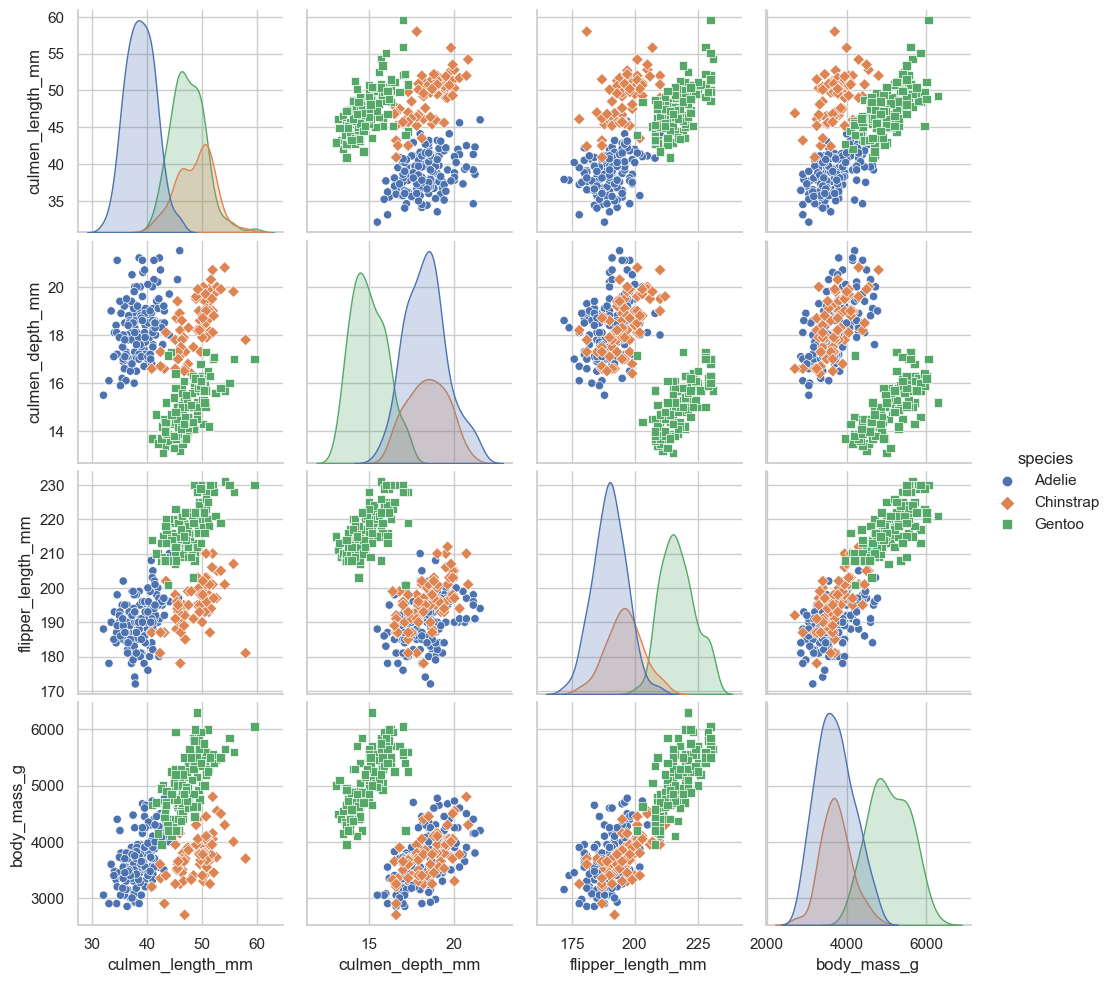

In [134]:
sns.pairplot(df, hue="species", markers = ['o','D','s'])

<div style="height: 40px; background: linear-gradient(to right, #FFD700, #FF8C00, #FF4500, #8B0000); border: none;"></div>


In [135]:
def error_calc(y_test, y_pred):
    count = 0
    for i in range(len(y_test)):
        if(y_pred[i] != y_test[i]):
            count+=1
    return count/len(y_pred)

### 4 Machine Learning 🤖

In this project, we will leverage three distinct ML Algorithms:

4.1 **Logistic Regression**<br>
4.2 **KNN (K-Nearest Neighbors)**<br>
4.3 **Decision Tree**

We have implemented a two-layer cross-validation strategy:

1. **Outer Level:** Utilizing 5-fold cross-validation to estimate the overall performance of our model.
2. **Inner Level:** Employing 10-fold cross-validation for the fine-tuning and selection of the optimal model.

Let the machine learning journey begin! 🚀

#### 4.1 Two-Layer Cross Validation for Logistic Regression

In this phase, we implement a robust two-layer cross-validation strategy for Logistic Regression:

1. **Outer Level:** Employing a 5-fold cross-validation to estimate the model's performance, with a focus on simple error calculation.
2. **Inner Level:** Leveraging a 10-fold cross-validation for the meticulous selection of the optimal model, utilizing sequential feature selection techniques.

This meticulous approach ensures both a comprehensive evaluation of the model's general performance and an informed selection of the most effective features. 🎯🔄

Selected Attribute Indices: [ True False  True  True  True False False  True False] [0, 2, 3, 4, 7]
Selected Attribute Indices: [ True  True False False False False False  True False] [0, 1, 7]
Selected Attribute Indices: [ True False  True False  True False False  True False] [0, 2, 4, 7]
Selected Attribute Indices: [ True  True False False False False False  True False] [0, 1, 7]
Selected Attribute Indices: [ True False  True False  True False False  True False] [0, 2, 4, 7]


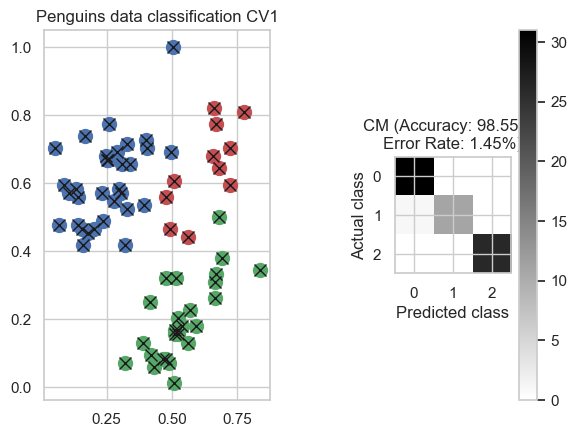

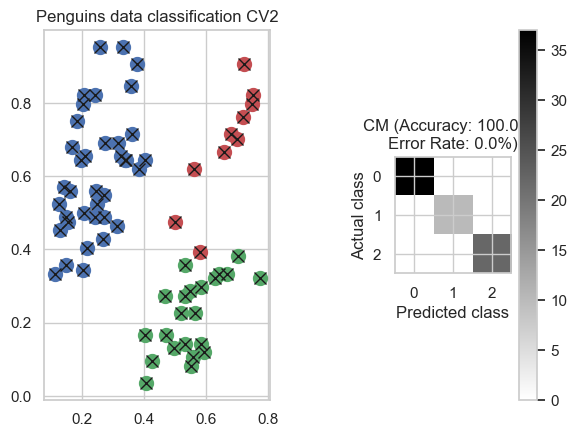

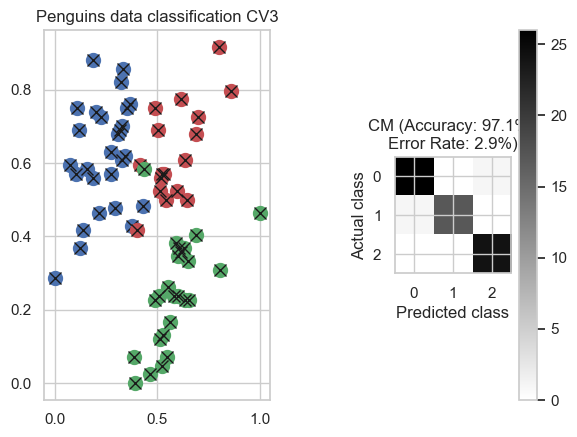

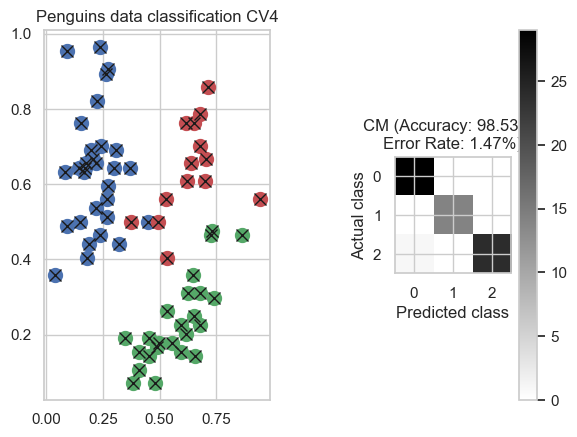

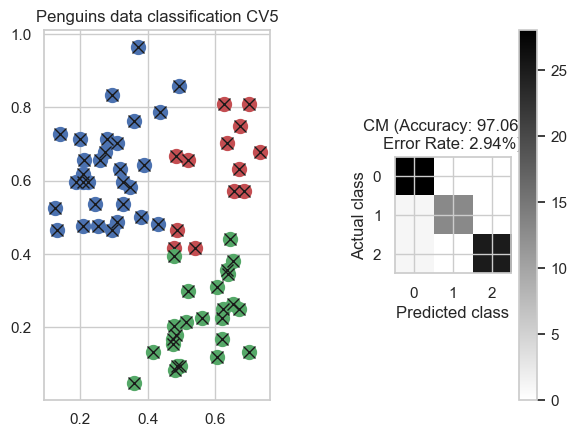

In [136]:
#Creating X and y:
columns = df_std_encoded.columns
X = np.asarray(df_std_encoded[columns[1:]])
y = np.asarray(df_std_encoded.species).squeeze()
C =len(classNames)

# Create crossvalidation partition for evaluation
K=5 # split number
kf = KFold(n_splits = K, shuffle = True) #Outer 5-Fold cross-validation

# Initialize variables
Features = np.zeros((M,K))
Error_train = np.empty((K,1))
Error_test = np.empty((K,1))
Error_train_fs = np.empty((K,1))
Error_test_fs = np.empty((K,1))
Error_train_nofeatures = np.empty((K,1))
Error_test_nofeatures = np.empty((K,1))

k=0
for train_index, test_index in kf.split(X):
    X_train, y_train = X[train_index,:], y[train_index]
    X_test, y_test = X[test_index,:], y[test_index]
    internal_cross_validation  = 10
     
    
    # Compute squared error with all features selected (no feature selection)
    m = LogisticRegression(fit_intercept=True).fit(X_train, y_train)
    Error_train[k] = error_calc(y_train, m.predict(X_train))
    Error_test[k] = error_calc(y_test, m.predict(X_test))
    
    # Compute squared error with feature subset selection
    
    selector = SequentialFeatureSelector(LogisticRegression(), n_features_to_select='auto', direction='forward', scoring="balanced_accuracy", tol=0.01, cv=internal_cross_validation)
    selector.fit_transform(X_train,y_train)

    selected_attributes_mask = selector.get_support()

    # Convert boolean mask to a list
    selected_attributes_mask_list = list(selected_attributes_mask)

    # Get the indices of selected attributes as a list
    selected_attributes = [i for i, x in enumerate(selected_attributes_mask_list) if x]

    # Print or use the selected attribute indices
    print("Selected Attribute Indices:", selected_attributes_mask,selected_attributes)

    if len(selected_attributes) == 0:
        print('No features were selected, i.e. the data (X) in the fold cannot describe the outcomes (y).' )
    else:
        m = LogisticRegression(fit_intercept=True).fit(X_train[:,selected_attributes], y_train)
        y_pred_train = m.predict(X_train[:,selected_attributes])
        Error_train_fs[k] = error_calc(y_train,y_pred_train)
        y_pred_test = m.predict(X_test[:,selected_attributes])
        Error_test_fs[k] = error_calc(y_test,y_pred_test )
        
         #plot the classification result
    
        plt.figure(k)
        plt.subplot(1,2,1)
        plt.title('Penguins data classification CV{0}'.format(k+1))

        # Plot the classfication results
        styles = ['ob', 'or', 'og']
        for c in range(C):
            class_mask = (y_pred_test==c)
            plt.plot(X_test[class_mask,0], X_test[class_mask,1],  styles[c], markersize=10)
            plt.plot(X_test[class_mask,0], X_test[class_mask,1], 'kx', markersize=8)


        # Compute and plot confusion matrix
        cm = confusion_matrix(y_test, y_pred_test);
        accuracy = round(100*cm.diagonal().sum()/cm.sum(),2)
        error_rate = round(100-accuracy,2) #error rate = 100% - accurecy percentage

        #plt.figure(i)
        plt.subplot(1,3,3)
        plt.imshow(cm, cmap='binary', interpolation='None')
        plt.colorbar()
        plt.xticks(range(C))
        plt.yticks(range(C))

        plt.xlabel('Predicted class')
        plt.ylabel('Actual class');
        plt.title('CM (Accuracy: {0}%, \nError Rate: {1}%)'.format(accuracy, error_rate))
        c=c+1
        
    k = k+1    

In [137]:
print("Generalization Error using LR: ",round(Error_test_fs.mean()*100, 2), "%")

Generalization Error using LR:  1.75 %


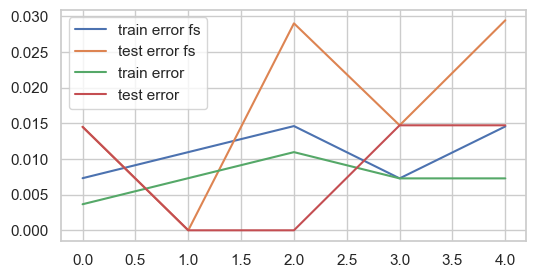

In [138]:
plt.figure(figsize = (6,3))
plt.plot(Error_train_fs, label = 'train error fs')
plt.plot(Error_test_fs, label = 'test error fs')
plt.plot(Error_train, label = 'train error')
plt.plot(Error_test, label = 'test error')
plt.legend()

#### 4.2 KNN

In [139]:
columns = df_std_encoded.columns
X = np.asarray(df_std_encoded[columns[1:-5]])
y = np.asarray(df_std_encoded.species).squeeze()

# Define the objective function for Optuna
def objective(trial):
    # Define hyperparameters to be optimized
    params = {
        'n_neighbors': trial.suggest_int('n_neighbors', 1, 10),
        'metric': trial.suggest_categorical('metric',['euclidean','cityblock','minkowski', 'cosine'])
    }

    # Initialize a KNeighborsClassifier
    model = KNeighborsClassifier(**params)

    # Use cross_val_score for performance evaluation
    outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=outer_cv, n_jobs=-1)

    # Return the average accuracy as the objective value
    return scores.mean()

# Perform Optuna hyperparameter optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Get the best hyperparameters
best_params = study.best_params
print(f'Best Hyperparameters: {best_params}')

# Initialize the final model with the best hyperparameters
final_model_knn = KNeighborsClassifier(**best_params)

# Perform cross-validation with the final model
final_cv_scores = cross_val_score(final_model_knn, X, y, cv=10, n_jobs=-1)

# Display the overall performance
average_final_cv_score = round(final_cv_scores.mean(),2)*100
print(f'Average Accuracy across outer folds with the best model: {average_final_cv_score}')

[I 2023-12-29 11:35:34,360] A new study created in memory with name: no-name-33b26631-7d52-49c6-9fec-6277560e58ce
[I 2023-12-29 11:35:34,482] Trial 0 finished with value: 0.9825234441602728 and parameters: {'n_neighbors': 1, 'metric': 'euclidean'}. Best is trial 0 with value: 0.9825234441602728.
[I 2023-12-29 11:35:34,526] Trial 1 finished with value: 0.9854219948849104 and parameters: {'n_neighbors': 7, 'metric': 'minkowski'}. Best is trial 1 with value: 0.9854219948849104.
[I 2023-12-29 11:35:34,571] Trial 2 finished with value: 0.9825234441602728 and parameters: {'n_neighbors': 1, 'metric': 'minkowski'}. Best is trial 1 with value: 0.9854219948849104.
[I 2023-12-29 11:35:34,628] Trial 3 finished with value: 0.9766410912190964 and parameters: {'n_neighbors': 10, 'metric': 'minkowski'}. Best is trial 1 with value: 0.9854219948849104.
[I 2023-12-29 11:35:34,673] Trial 4 finished with value: 0.9825234441602728 and parameters: {'n_neighbors': 1, 'metric': 'minkowski'}. Best is trial 1 wi

[I 2023-12-29 11:35:39,517] Trial 45 finished with value: 0.9795822676896846 and parameters: {'n_neighbors': 8, 'metric': 'euclidean'}. Best is trial 7 with value: 0.9912617220801364.
[I 2023-12-29 11:35:39,537] Trial 46 finished with value: 0.98537936913896 and parameters: {'n_neighbors': 3, 'metric': 'cityblock'}. Best is trial 7 with value: 0.9912617220801364.
[I 2023-12-29 11:35:39,557] Trial 47 finished with value: 0.9854219948849104 and parameters: {'n_neighbors': 6, 'metric': 'euclidean'}. Best is trial 7 with value: 0.9912617220801364.
[I 2023-12-29 11:35:39,577] Trial 48 finished with value: 0.9912617220801364 and parameters: {'n_neighbors': 4, 'metric': 'minkowski'}. Best is trial 7 with value: 0.9912617220801364.
[I 2023-12-29 11:35:39,592] Trial 49 finished with value: 0.9912617220801364 and parameters: {'n_neighbors': 5, 'metric': 'euclidean'}. Best is trial 7 with value: 0.9912617220801364.


Best Hyperparameters: {'n_neighbors': 4, 'metric': 'euclidean'}
Average Accuracy across outer folds with the best model: 98.0


#### 4.3 Decision Tree

In [140]:
def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 15)
    }
    
    model = DecisionTreeClassifier(**params)
    outer_cv = KFold(n_splits = 5, shuffle = True, random_state = 42 )
    scores = cross_val_score(model, X,y, cv = outer_cv, n_jobs = 1)
    return scores.mean()

# Perform Optuna hyperparameter optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Get the best hyperparameters
best_params = study.best_params
print(f'Best Hyperparameters: {best_params}')

final_model_dt = DecisionTreeClassifier(**best_params)
final_cv_scores = cross_val_score(final_model_dt, X,y, cv=10, n_jobs = 1)
average_final_cv_score = round(final_cv_scores.mean(),2)*100
print("Average Final Score: {0}%". format(average_final_cv_score))

[I 2023-12-29 11:35:39,629] A new study created in memory with name: no-name-64dbbace-e3df-44ad-9b4c-d931e86ab13f
[I 2023-12-29 11:35:39,644] Trial 0 finished with value: 0.9708866155157715 and parameters: {'max_depth': 10}. Best is trial 0 with value: 0.9708866155157715.
[I 2023-12-29 11:35:39,658] Trial 1 finished with value: 0.9621909633418586 and parameters: {'max_depth': 11}. Best is trial 0 with value: 0.9708866155157715.
[I 2023-12-29 11:35:39,672] Trial 2 finished with value: 0.9738277919863598 and parameters: {'max_depth': 5}. Best is trial 2 with value: 0.9738277919863598.
[I 2023-12-29 11:35:39,685] Trial 3 finished with value: 0.9562233589087809 and parameters: {'max_depth': 4}. Best is trial 2 with value: 0.9738277919863598.
[I 2023-12-29 11:35:39,699] Trial 4 finished with value: 0.9622335890878091 and parameters: {'max_depth': 6}. Best is trial 2 with value: 0.9738277919863598.
[I 2023-12-29 11:35:39,712] Trial 5 finished with value: 0.9651321398124466 and parameters: {'

Best Hyperparameters: {'max_depth': 5}
Average Final Score: 96.0%


### 5. Pickling the KNN Model

In [141]:
with open('final_model_knn.pkl', 'wb') as file:
    pickle.dump(final_model_knn, file) #The model is saved as "final_model_knn.pkl"

In [143]:
df_std_encoded[columns[1:-5]]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,0.254545,0.666667,0.152542,0.291667
1,0.269091,0.511905,0.237288,0.305556
2,0.298182,0.583333,0.389831,0.152778
3,0.429888,0.482282,0.490088,0.417154
4,0.167273,0.738095,0.355932,0.208333
...,...,...,...,...
339,0.429888,0.482282,0.490088,0.417154
340,0.534545,0.142857,0.728814,0.597222
341,0.665455,0.309524,0.847458,0.847222
342,0.476364,0.202381,0.677966,0.694444
